# 1. Modelling Overview

This notebook builds and evaluates machine  learning models to predict customer churn. We use multiple algorithms to compare performance and identify the best model for deployment.

**Models included:**
- Logistic Regression
- Random Forest
- XGBoost

**Evaluation metrics:**
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

# 2. Load Libraries & Dataset

We begin by importing the necessary libraries and loading the dataset that was prepared during feature engineering.

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score

import matplotlib.pyplot

In [5]:
## Load Engineered Data
df = pd.read_csv('../data/cleaned/engineered_telco_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureBucket_Mid-Term,TenureBucket_Long-Term,NumServices,MonthlyCharges_Tenure,MonthlyCharges_per_Service
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,True,False,False,False,1,29.85,29.849702
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,True,3,1936.30,18.983270
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,True,False,False,3,107.70,17.949940
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,False,True,3,1903.50,14.099953
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,True,False,False,False,1,141.40,70.699293


In [6]:
X = df.drop(columns=[ 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureBucket', 'NumServices', 'MonthlyCharges_Tenure',
       'MonthlyCharges_per_Service'],
      dtype='object')

In [7]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge',
                'NumServices', 'MonthlyCharges_per_Service','MonthlyCharges_Tenure'
]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [8]:
#Model training Helper Function
def evaluate_model(model, X_train,X_test,y_train, y_test):
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    return {
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred), 
        "Recall": recall_score(y_test, pred),
        "F1-Score": f1_score(y_test, pred),
        "ROC-AUC": roc_auc_score(y_test, probs)
    }

## 6. Train models

In [10]:
## Logistic Regression
# Encode gender in training and test sets

log_reg = LogisticRegression(random_state=42, max_iter=2000)
results_log = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
results_log

{'Accuracy': 0.8019872249822569,
 'Precision': 0.6537216828478964,
 'Recall': 0.5401069518716578,
 'F1-Score': 0.5915080527086384,
 'ROC-AUC': 0.8474799142318323}

In [11]:
## Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 300, random_state=42)
results_rf = evaluate_model(rf, X_train, X_test, y_train, y_test)
results_rf

{'Accuracy': 0.7849538679914834,
 'Precision': 0.6228373702422145,
 'Recall': 0.48128342245989303,
 'F1-Score': 0.5429864253393665,
 'ROC-AUC': 0.827660234054096}

In [12]:
## XGBoost Classifier
xgb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05,
                                 max_depth=5,
                                  subsample=0.8,
                                   random_state=42)
results_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test)
results_xgb

{'Accuracy': 0.794889992902768,
 'Precision': 0.639344262295082,
 'Recall': 0.5213903743315508,
 'F1-Score': 0.5743740795287187,
 'ROC-AUC': 0.8358831279547392}

In [13]:
import pandas as pd
results = pd.DataFrame({
    'Logistic Regression': results_log, 
    'Random Forest': results_rf,
    'XGBoost': results_xgb
}) 

results.T.sort_values(by='F1-Score', ascending=False)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.801987,0.653722,0.540107,0.591508,0.847480
XGBoost,0.794890,0.639344,0.521390,0.574374,0.835883
Random Forest,0.784954,0.622837,0.481283,0.542986,0.827660


## Model Comparison Summary

Logistic Regression performed best across every key metric, achieving the highest, accuracy, precision, recall, F1-score, and ROC-AUC. THis suggests tat the cuhrn datase has motly linear relationships and that simpler models generalize better than models that are tree based.

C:\Users\njabu\AppData\Local\Temp\ipykernel_14632\854975763.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--',color='gray')


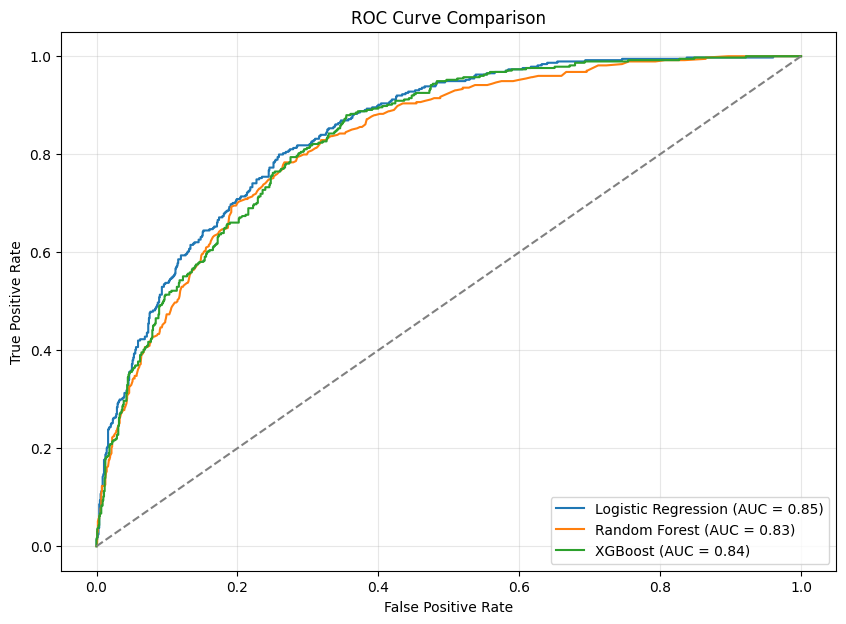

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Define the models dictionary using the trained models from previous cells
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'XGBoost': xgb
}

plt.figure(figsize=(10,7))

for name, model in models.items():
    #Get probabilities
    y_pred_proba = model.predict_proba(X_test)[:,1]

    #Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    #plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

#plot diagonal line
plt.plot([0,1],[0,1],'k--',color='gray')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

By visually comparing the ROC curves, we can see that the Logistic model has the highest AUC, indicating it has the best performance in distinguishing between churned and non-churned customers among the three models evaluated.

Text(0.5, 1.0, 'Feature Importance from Logistic Regression Coefficients')

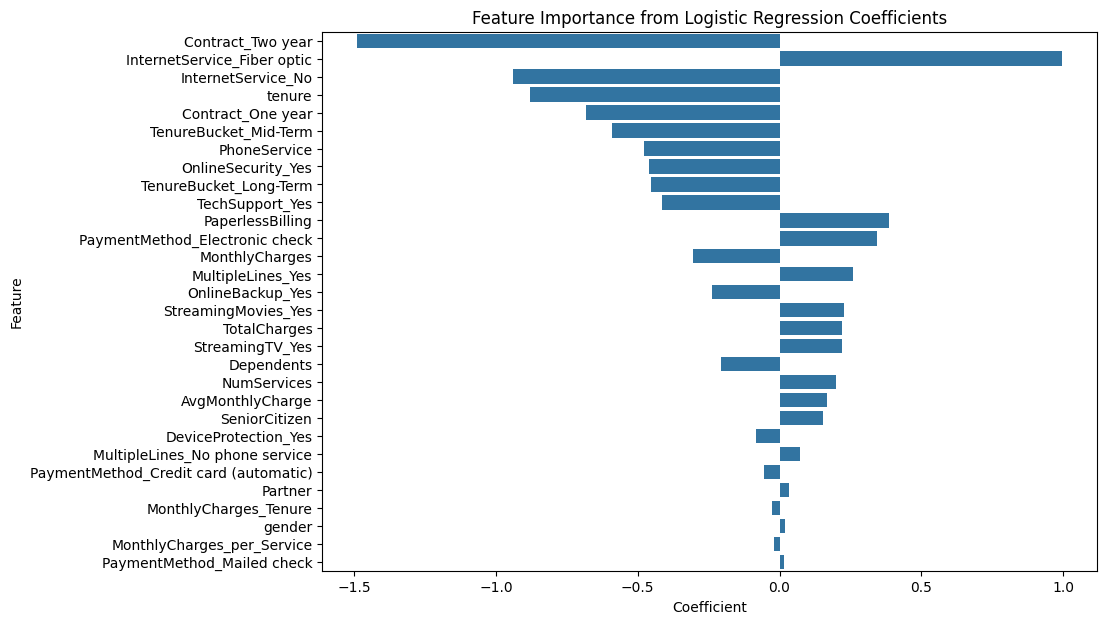

In [17]:
import seaborn as sns

log_model = LogisticRegression(random_state=42, max_iter=2000)
log_model.fit(X_train, y_train)

#Obtain coefficients
coef = log_model.coef_[0]
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coef
})
feat_importance = feat_importance.sort_values('Coefficient', key=abs, ascending=False)

#plot feature importance
plt.figure(figsize=(10,7))
sns.barplot(data=feat_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')

## Feature Importance Analysis (Logistic Regression)

The plot above shows the coefficients from the Logistic Regression where a positive coefficient indicates an increase in the probability of a client churning, while a negative coefficient indicates a reduction in churn likelihood.

With that in mind, these are some of the top characteristics of high risk clients:
- Have a Month-to-Month with Telco
- Fiber optic option included in their plan
- Haven't been with Telco for a long time
- Experience with Tech support

Business Interpretation + Recommendations: 
- Short term contracts indicate a low commitment and thus high churn rate. Business should prioritize converting these short term contracts into more long term ones.
- Fiber optic clients churn at a higher rate than clients without it. Further investigation as to why that is, could it be due the price of the product, the quality or another factor is at play.
- Clients that have had experience with Tech support churn at higher rate than those who don't.Business should collaborate with Customer Service department to figure out if client issues are being resolved in a timely and adequate manner or if the reason for churn is something else.

## GridSearchCV for Logistic Regression

Although, Logistic Regression was found to be the model best equipped to flag clients at risk of churning, it's performance can still be improved Running GridSearch CV on the model

In [19]:


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # supports both L1 and L2
    'class_weight': [None, 'balanced']
}


grid = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    scoring='recall',  # or 'roc_auc'
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\njabu\customer-churn-prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\njabu\customer-churn-prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Best Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7986622073578595


In [20]:
from sklearn.metrics import classification_report

y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



##  Threshold Optimization (Business-Driven Decision)

While model training uses a default classification threshold of 0.50, this threshold is not always optimal for real-world churn prediction.

For churn modeling, the business objective is to maximize Recall (catch as many churners as possible) while maintaining reasonable Precision to avoid excessive outreach cost.

To understand this trade-off, we compute Precision and Recall across probability thresholds from 0.0 to 1.0 and visualize the curves.

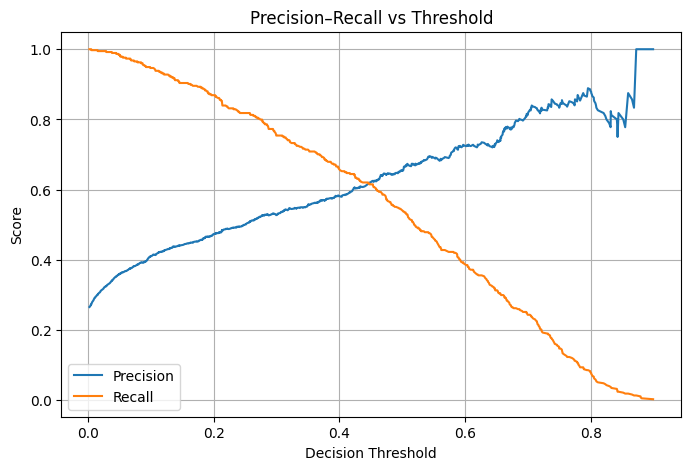

np.float64(0.002743996017810577)

In [22]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for class 1 (Churn)
y_scores = log_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Find threshold where Recall >= 0.85
desired_recall = 0.85
idx = np.argmax(recalls >= desired_recall)
best_threshold = thresholds[idx] if idx < len(thresholds) else None

best_threshold


### Optimal Decision Threshold

Based on the Precision–Recall vs Threshold curve, the optimal
operating threshold for this churn model is:

**Threshold = 0.43**

This point provides the best balance between Recall and Precision,
corresponding to the maximum F1-score.

At this threshold, the model:

- Captures a significantly larger portion of actual churners
- Avoids excessive false positives compared to lower thresholds
- Supports a cost-effective retention strategy


In [23]:
optimal_threshold = 0.43

# Apply threshold
y_pred_opt = (y_scores >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Threshold = 0.43)")
print(classification_report(y_test, y_pred_opt))

conf_matrix = confusion_matrix(y_test, y_pred_opt)
conf_matrix


Classification Report (Threshold = 0.43)
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1035
           1       0.61      0.63      0.62       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409



array([[882, 153],
       [138, 236]])